In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils.imports import *

In [3]:
PATH = Path('data/landcover')
path_x_512 = PATH/'preprocessed'/'landcover_512'/'train'
path_y_512 = PATH/'preprocessed'/'landcover_512'/'train_class'
path_stats = PATH/'preprocessed'/'landcover_512'/'stats.npy'

sz = 512
test_size = 0.2
gpu_start = 8
world_size = 2
bs = world_size * 19
num_workers = 16 * world_size
load_model = 'data/models/dlinknet/final.th'

In [4]:
%run train_landcover {str(PATH)} {str(path_x_512)} {str(path_y_512)} {str(PATH)} {str(path_stats)}\
    {bs} {sz} {gpu_start} --world_size={world_size} --load_model={load_model}

In [5]:
learner.lr_find()
learner.sched.plot()

  5%|▌         | 17/318 [00:36<05:19,  1.06s/it, loss=1.73]

KeyboardInterrupt: 

## Train

In [5]:
lr = 3 * 1e-2
name = 'first_run'

log_dir = f'{PATH}/training_logs'

sargs = {
    'best_save_name': f'{name}_best_model',
    'cycle_save_name': f'{name}',
    'callbacks': [
        LoggingCallback(f'{log_dir}/{name}_log.txt', print_freq)
    ]
}

In [6]:
learner.fit(lr, 3, cycle_len=2, cycle_mult=2, wds=1e-4, **sargs)

epoch      trn_loss   val_loss   
    0      0.975832   0.889328  
    1      0.777941   0.708252  
    2      0.768892   0.649748  
    3      0.644949   0.563055  
    4      0.587473   0.539944  
    5      0.562947   0.498041  
    6      0.63338    0.585094  
    7      0.615321   0.505812  
    8      0.547356   0.487044  
 20%|█▉        | 63/318 [01:09<03:54,  1.09it/s, loss=0.538]

KeyboardInterrupt: 

In [7]:
save_sched(learner.sched, PATH)

1cycle

In [10]:
sargs = save_args('second_run', PATH)

In [11]:
learner.fit(lr / 2, 1, cycle_len=10, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

epoch      trn_loss   val_loss   
    0      0.485647   0.44026   
    1      0.464335   0.426565  
    2      0.447026   0.448403  
    3      0.467992   0.435079  
    4      0.460249   0.412892  
    5      0.453072   0.417293  
    6      0.447584   0.411517  
    7      0.415537   0.391991  
    8      0.39664    0.380868  
    9      0.403563   0.375168  


[0.3751675028211837]

In [12]:
save_sched(learner.sched, PATH)

In [19]:
learner.sched.plot_loss??
learner.sched.plot_lr??

Signature: learner.sched.plot_lr()
Source:   
    def plot_lr(self):
        '''Plots learning rate in jupyter notebook or console, depending on the enviroment of the learner.'''
        if not in_ipynb():
            plt.switch_backend('agg')
        if self.record_mom:
            fig, axs = plt.subplots(1,2,figsize=(12,4))
            for i in range(0,2): axs[i].set_xlabel('iterations')
            axs[0].set_ylabel('learning rate')
            axs[1].set_ylabel('momentum')
            axs[0].plot(self.iterations,self.lrs)
            axs[1].plot(self.iterations,self.momentums)   
        else:
            plt.xlabel("iterations")
            plt.ylabel("learning rate")
            plt.plot(self.iterations, self.lrs)
        if not in_ipynb():
            plt.savefig(os.path.join(self.save_path, 'lr_plot.png'))
File:      /data/ywx/home/landcover-diff/fastai/sgdr.py
Type:      method


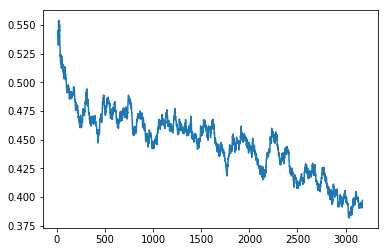

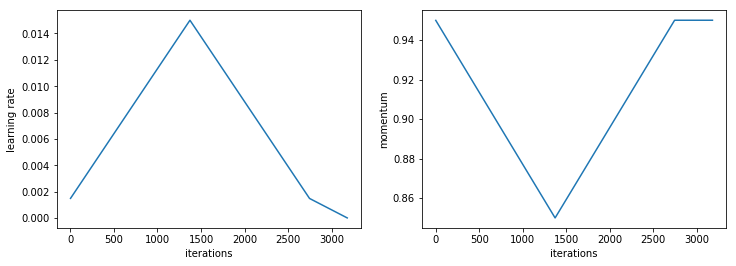

In [20]:
learner.sched.plot_loss()
learner.sched.plot_lr()

In [13]:
??save_sched

Signature: save_sched(sched, save_dir)
Docstring: <no docstring>
Source:   
def save_sched(sched, save_dir):
    if (_rank != 0) or not save_dir: return 
    log_dir = f'{save_dir}/training_logs'
    sched.save_path = log_dir
    sched.plot_loss()
    sched.plot_lr()
File:      /data/ywx/home/landcover-diff/train_landcover.py
Type:      function


### second run

In [22]:
sargs = save_args('long_run', PATH)
learner.fit(lr / 2, 1, cycle_len=30, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)
save_sched(learner.sched, PATH)

epoch      trn_loss   val_loss   
    0      0.4223     0.37717   
    1      0.419436   0.386695  
    2      0.417337   0.38669   
    3      0.398492   0.378618  
    4      0.416947   0.395903  
    6      0.416162   0.390906  
    7      0.407294   0.39155   
    8      0.403388   0.385908  
    9      0.399486   0.374958  
    10     0.421761   0.39006   
    11     0.408644   0.371898  
    12     0.402963   0.361804  
    13     0.411155   0.430524  
    14     0.397084   0.370629  
    15     0.397924   0.365982  
    16     0.384667   0.362273  
    17     0.369879   0.353068  
    18     0.37506    0.373599  
    19     0.365455   0.347126  
    20     0.372687   0.366404  
    21     0.34893    0.341087  
    22     0.367069   0.339187  
    23     0.356445   0.337056  
    24     0.344763   0.337254  
    25     0.348946   0.329926  
    26     0.321073   0.325979  
    27     0.334804   0.325962  
    28     0.317632   0.319367  
    29     0.311765   0.321664  


### Old runs

In [ ]:
learner.fit(lr, 1, cycle_len=30, wds=1e-4, **sargs)

epoch      trn_loss   val_loss   
    0      1.295502   1.3262    
    1      0.984761   0.875964  
    2      0.75883    0.781338  
    3      0.637143   0.659636  
    4      0.577678   0.522905  
    5      0.59514    0.519008  
    6      0.502914   0.482961  
    7      0.524926   0.46308   
    8      0.482704   0.446322  
    9      0.511796   0.534833  
    10     0.442309   0.425425  
    11     0.460168   0.424404  
    12     0.43051    0.407233  
    13     0.419433   0.377661  
    14     0.390011   0.387018  
    15     0.372927   0.369506  
    16     0.393826   0.35041   
    17     0.371881   0.339988  
    18     0.339941   0.345781  
    19     0.325772   0.32999   
    20     0.329395   0.310985  
    21     0.32497    0.312878  
    22     0.305828   0.304708  
    23     0.275648   0.291252  
    24     0.290158   0.300897  
    25     0.288935   0.290934  
    26     0.265632   0.288252  
    27     0.25269    0.286312  
    28     0.254332   0.286012  
    29   

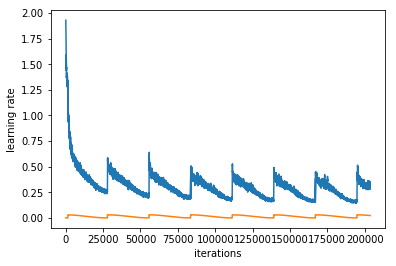

In [29]:
save_sched(learner.sched, save_dir)

## Look at data

In [43]:
dl = iter(learner.data.trn_dl)

In [44]:
x, y = next(dl)

In [45]:
print(x.shape, y.shape)
x, y = denorm(x), denorm(y, is_y=True)
print(x.shape, y.shape)

torch.Size([40, 3, 512, 512]) torch.Size([40, 512, 512])
(40, 512, 512, 3) (40, 512, 512)


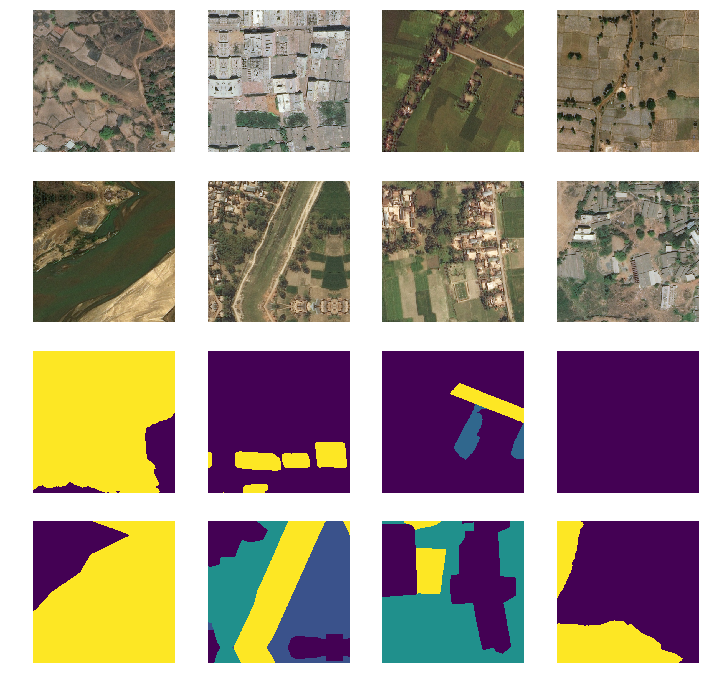

In [46]:
idx = np.random.randint(bs, size=8)
data = list(x[idx]) + list(y[idx])
plots(data, rows=4)